![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    """
    niter = 0
    ncalls = 0
    x_pts = []
    while abs(a-b) > xtol:
        if niter == maxiter:
            return x_pts
        
        niter += 1
        ncalls += 2
        m = (a+b)/2
        x_pts.append(m)
        f_m = f(m)
        
        if f(a)*f_m < 0:
            b = m
            if abs(f_m) < ytol:
                return x_pts
            
        else:
            a = m   
            if abs(f_m) < ytol:
                return x_pts
            
    return x_pts

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    """
    pts = []
    for i in range(maxiter):
        step = f(x)/df(x)
        newx = x - step
        pts.append(x)
        if abs(step) < xtol:
            if newx > 0:
                pts.append(newx)
            return pts
        if abs(f(x)) < ytol:
            if newx > 0:
                pts.append(newx)            
            return pts
        x = newx
    return pts

## Derivadas numéricas

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    a = f(x+h)
    b = f(x-h)
    return (a-b)/(2*h)

def ddf_central(f, x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    a = df_central(f, x+h)
    b = df_central(f, x-h)
    return (a-b)/(2*h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

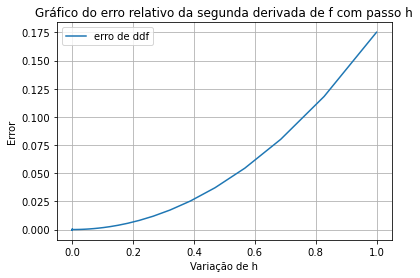

In [5]:
hs = np.logspace(-27,0,base=2, num=100)
erros = [ddf_central(lambda x: np.e**x, 0, i) - 1 for i in hs]
plt.plot(hs,erros, label='erro de ddf')
plt.grid()
plt.legend()
plt.xlabel('Variação de h')
plt.ylabel('Error')
plt.title('Gráfico do erro relativo da segunda derivada de f com passo h')
ax = plt.gca();

In [6]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?

Obs: Use erros relativos!

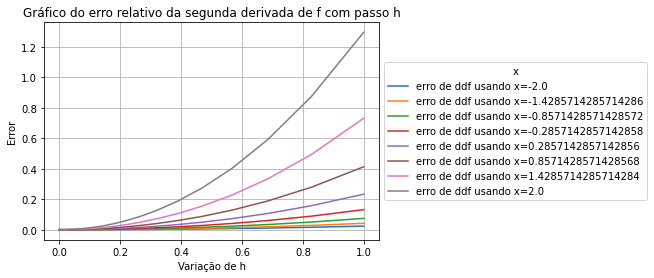

In [7]:
hs = np.logspace(-27, 0, base=2, num=100)
xs = np.linspace(-2, 2, num=8)
for i in xs:
    erros = [ddf_central(lambda x: np.exp(x), i, j) - np.e**i for j in hs]
    plt.plot(hs,erros, label=f'erro de ddf usando x={i}')
plt.grid()
plt.xlabel('Variação de h')
plt.ylabel('Error')
plt.title('Gráfico do erro relativo da segunda derivada de f com passo h')
plt.legend(title="x", bbox_to_anchor=(1,0.5), loc="center left")
ax = plt.gca();

In [8]:
assert len(ax.lines) >= 8
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Comente.

Analisando os gráficos vemos que quanto maior o valor da derivada de f num certo valor de x, maior é o erro inicial, ou seja, para atingir uma determinada precisão, quanto maior for a derivada num determinado x, menor terá q ser o passo h para que se consiga atingir a precisão desejada. 

A princípio podemos olhar a diferença do erro quando h=1, nessa primeira comparação os erros para cada um dos valores de x já se iniciam diferentes (pois suas derivadas tem valores diferentes e estamos olhando para um mesmo h), vemos nitidamente que quanto menor o x, de fato, menor é o alcance do erro, isso se dá pois no caso observado df(x)=f(x)=e^x , logo, conforme  x descresce, sua derivada também descresce, ou seja, se o erro depende da derivada e do passo h, comparando diversos valores de x, para uma mesma variação de h, quanto menor for o x, menor será o ALANCE do erro, e ao passo que h tende à 0, todos os erros também dendem a 0 (independente do x).

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [9]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [10]:
def g1(x):
    return np.exp(x) - 2

def g2(x):
    return df_central(f, x, h=1e-3)

def g3(x):
    return df_central(f, x)

In [11]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

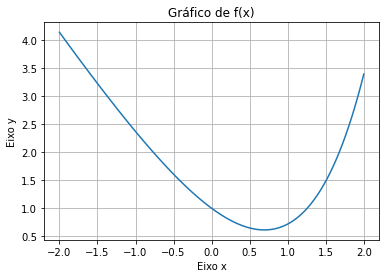

In [12]:
xs = np.linspace(-2,2,num=100)
ys = [f(x) for x in xs]
plt.plot(xs,ys)
plt.grid()
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.title('Gráfico de f(x)')
ax = plt.gca();

In [13]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

Poderíamos escolher por exemplo o intervalo [-1,1], visto que a derivada é 0 em aproximadamente x=0.7, o intervalo citado vai conter valores negativos e positivos da derivada de f.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

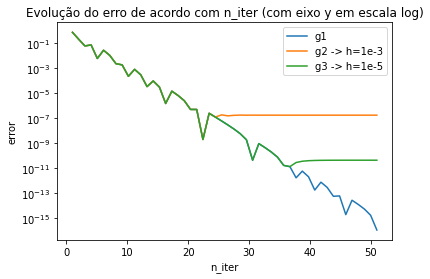

In [14]:
xs = np.linspace(0,50)+1
y1 = [abs(i - np.log(2)) for i in bissecao_pts(g1, -1, 1, xtol=0, ytol=0, maxiter=50)]
y2 = [abs(j - np.log(2)) for j in bissecao_pts(g2, -1, 1, xtol=0, ytol=0, maxiter=50)]
y3 = [abs(k - np.log(2)) for k in bissecao_pts(g3, -1, 1, xtol=0, ytol=0, maxiter=50)]

plt.semilogy(xs,y1, label='g1')
plt.semilogy(xs,y2, label='g2 -> h=1e-3')
plt.semilogy(xs,y3, label='g3 -> h=1e-5')
plt.legend()
plt.xlabel('n_iter')
plt.ylabel('error')
plt.title('Evolução do erro de acordo com n_iter (com eixo y em escala log)')
ax = plt.gca();

In [15]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Pode-se perceber facilmente um tipo de limitação em g2 e g3. Ao passo que n_iter vai aumentando o erro diminui (como esperado), podemos ver que inicialmente g1, g2 e g3 descrescem juntos, ficando sobrepostos (possuem o mesmo erro), porém g2 e g3 param de descrescer e se estabilizam apartir de uma certa iteração, isso se dá pelo tamanho do passo (h) utilizado na aproximação do valor de df. Com um passo menor obtêm-se mais precisão, logo g2 com h=1e-3 tem uma limitação maior que g3 utilizando h=1e-5.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [16]:
def h1(x):
    return np.exp(x)

def h2(x):
    return ddf_central(f,x)

In [17]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

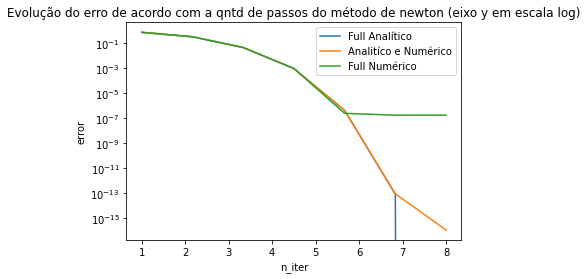

In [18]:
xs = np.linspace(0,7, num=7)+1
y_full_analitc = [abs(i-np.log(2)) for i in newton_pts(g1, h1, 0)]
y_analitc_num = [abs(i-np.log(2)) for i in newton_pts(g1, h2, 0)]
y_full_num = [abs(i-np.log(2)) for i in newton_pts(g2, h2, 0)]

plt.semilogy(xs,y_full_analitc, label='Full Analítico')
plt.semilogy(xs,y_analitc_num, label='Analitíco e Numérico')
plt.semilogy(xs,y_full_num, label='Full Numérico')

plt.legend()
plt.xlabel('n_iter')
plt.ylabel('error')
plt.title('Evolução do erro de acordo com a qntd de passos do método de newton (eixo y em escala log)')
ax = plt.gca();

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

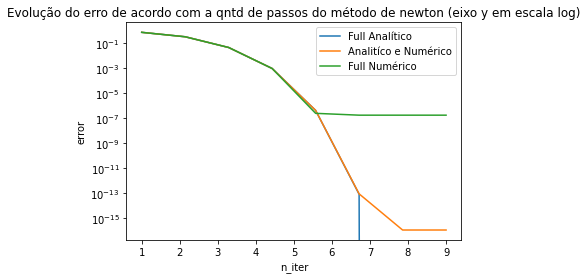

In [20]:
xs = np.linspace(0,8, num=8)+1    
y_full_analitc = [abs(i-np.log(2)) for i in newton_pts(g1, h1, 0, xtol=1e-15, ytol=1e-15)]
y_analitc_num = [abs(i-np.log(2)) for i in newton_pts(g1, h2, 0, xtol=1e-15, ytol=1e-15)]
y_full_num = [abs(i-np.log(2)) for i in newton_pts(g2, h2, 0, xtol=1e-15, ytol=1e-15)]

plt.semilogy(xs,y_full_analitc, label='Full Analítico')
plt.semilogy(xs,y_analitc_num, label='Analitíco e Numérico')
plt.semilogy(xs,y_full_num, label='Full Numérico')

plt.legend()
plt.xlabel('n_iter')
plt.ylabel('error')
plt.title('Evolução do erro de acordo com a qntd de passos do método de newton (eixo y em escala log)')
ax = plt.gca();

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

Pode-se perceber primeiro que o número de passos aumentou, isso se dá pois uma precisão mais fina requer mais passos para ser alcançada. 

Depois podemos ver também uma diferença na linha laranja (df analítica e ddf numérica), que, inicialmente é bem parecida com a linha azul (full analítica) pois sua primeira derivada também é analítica e, com isso tem peso mais relevante nos cálculos do que a segunda derivada (numérica), possibilitando então essa semelhança, porém, ao passar dos passos podemos ver que em um momento o fato da segunda derivada ser numérica começa a resultar em uma diferença, que ocorre devido a uma limitação de precisão vinda da segunda derivada (pois é um valor aproximado).

Extra: Analisando os gráficos vemos na linha verde que usando as derivadas numéricas existe uma limitação de precisão bem gritante (vinda das limitações de precisão das derivadas); Na linha azul (usando ambas as derivadas analíticas) o erro tende para 0 e até que bem rápido, devido à excelente precisão das derivadas analíticas; Já na linha laranja (df analítica e ddf numérica), como dito acima, inicialmente tem-se um ótima precisão, devido ao fato de a 1º derivada ser analítica e possuir peso mais significante nos cálculos, porém, chega um momento que a falta de precisão da 2º derivada começa a afetar e isso gera uma limitação. 

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

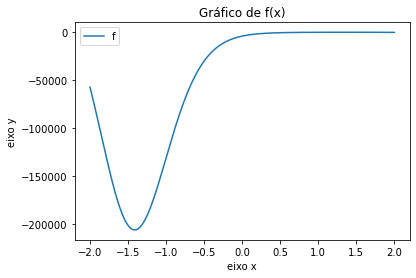

In [21]:
def f(x): return np.exp((x**2)-(2*x)+1) - 2**((x**3)-(6*x)+12)
x = np.linspace(-2,2, num=100000)
y = f(x)

plt.plot(x,y, label='f')
plt.legend()
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.title('Gráfico de f(x)')
ax = plt.gca();

In [22]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [23]:
def df(x): return np.exp((x**2)-(2*x)+1) * (2*x-2) - np.log(2) * 2**((x**3)-(6*x)+12) * (3*x**2-6)
x = bissecao_pts(df,-1.5,-1)

print(np.array(x))

[-1.25       -1.375      -1.4375     -1.40625    -1.421875   -1.4140625
 -1.41015625 -1.41210938 -1.41308594 -1.41259766 -1.4128418  -1.41296387
 -1.41290283 -1.41287231 -1.41288757 -1.41287994 -1.41287613 -1.41287422
 -1.41287327 -1.41287279 -1.41287255 -1.41287243 -1.41287237 -1.4128724
 -1.41287239 -1.4128724 ]


Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [24]:
y = [f(i) for i in x]
min_y = np.min(y)

print(np.array(y))
print(f'O valor mínimo de f no intervalo dado é: f(x)={min_y}')

[-191327.43213335 -205448.07103413 -205941.9419976  -206288.00613774
 -206265.11269191 -206313.9068241  -206310.26558092 -206314.41713842
 -206314.74515613 -206314.72688663 -206314.77246306 -206314.76792087
 -206314.77246967 -206314.77303578 -206314.77289508 -206314.77300102
 -206314.7730273  -206314.77303376 -206314.77303533 -206314.77303569
 -206314.77303577 -206314.77303579 -206314.77303579 -206314.77303579
 -206314.77303579 -206314.77303579]
O valor mínimo de f no intervalo dado é: f(x)=-206314.77303578667


Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [25]:
for i in x:
    if f(i) == min_y:
        x0 = i
        
print(f'O valor de x tal que f(x) resulta no menor valor do intervalo é: x={x0}')
print(f'Sua distância absoluta ao último pto dado pela bisseção é: {abs(x0 - x[-1])}')

O valor de x tal que f(x) resulta no menor valor do intervalo é: x=-1.4128724038600922
Sua distância absoluta ao último pto dado pela bisseção é: 7.450580596923828e-09


Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

In [26]:
def g1(x): return df_central(f, x)
def g2(x): return ddf_central(f, x)

possiveis_x = newton_pts(g1, g2, -1.5, xtol=1e-6, ytol=1e-6)
possiveis_y = [f(i) for i in possiveis_x]
newton_min_y = np.min(possiveis_y)

for i in possiveis_x:
    if f(i) == newton_min_y:
        x0_newton = i
      
print(f'Diferença absoluta entre x0 da bisseção e x0 de newton: {abs(x0 - x0_newton)}')
print(f'Diferença absoluta entre f(x0) da bisseção e f(x0) de newton: {abs(min_y - newton_min_y)}')

Diferença absoluta entre x0 da bisseção e x0 de newton: 4.7335770458900583e-07
Diferença absoluta entre f(x0) da bisseção e f(x0) de newton: 1.3760291039943695e-07


Extra: O método de newton encontrou um pto x0_newton, tal que f(x0_newton) é ligeiramente MAIOR que f(x0) encontrado pelo método da bisseção (com diferença mostrada acima). Isso se dá pois, ao utilizar derivadas numérica ficamos com a precisão limitada, se utilizássemos derivadas analíticas no método de newton conseguiríamos alcançar precisões bem mais finas. 

Vale ressaltar que o método de newton (mesmo pecando um pouco na precisão DESSE COMPARATIVO) efetua seus cálculos em bem menos iterações, e, como dito acima, se fosse utilizada derivadas analíticas teríamos resultados mais precisos e eficientes.